In [75]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt

In [73]:
def kmeans(dataset,k):
    centers = [] 
    for i in range(k):
        centers.append(initialize(dataset))
    for i in dataset:
        i["cluster"] = getCluster(getPoint(i),centers)
    k = 0
    oldCenters = centers
    while(True):
        if k > 30:
            break
        elif change(centers,oldCenters) and k > 0:
            break
        oldCenters = centers
        for i in range(len(centers)):
            centers[i] = getCenter(getClusterPoints(dataset,i))
        for i in dataset:
            i["cluster"] = getCluster(getPoint(i),centers)
        k+=1
        print(k)
    return dataset

In [2]:
def distance(element1,element2):
    print("This is a dumb function")

In [33]:
def initialize(dataset):
    center = []
    for i in dataset[0]:
        if i == "cluster":
            continue
        array = getList(dataset,i)
        center.append(random.uniform(min(array),max(array)))
    return center

In [64]:
def getCenter(clusterPoints):
    newCenter = []
    for i in range(len(clusterPoints[0])):
        array = []
        for j in clusterPoints:
            array.append(j[i])
        newCenter.append(np.average(np.array(array)))
    return newCenter

In [15]:
def getList(dataset,feature):
    array = []
    for i in dataset:
        array.append(i[feature])
    return array

In [21]:
def module(point):
    cModule = 0
    for i in point:
        cModule += point[i]**2
    return math.sqrt(cModule)

In [38]:
def getPoint(dPoint):
    point = []
    for i in dPoint:
        if i == "cluster":
            continue
        point.append(dPoint[i])
    return point

In [68]:
def change(centers,oldCenters):
    change = False
    for i in range(len(centers)):
        if ((np.linalg.norm(np.array(centers[i]) - np.array(oldCenters[i]))) > 0.01):
            change = True
            break
    return change

In [40]:
def getCluster(point,centers):
    minDis = np.linalg.norm(np.array(centers[0]) - np.array(point))
    minPos = 0
    for i in range(1,len(centers)):
        dis = np.linalg.norm(np.array(centers[i]) - np.array(point))
        if minDis > dis:
            minDis = dis
            minPos = i
    return minPos

In [27]:
def getClusterPoints(dataset,cluster):
    clusterPoints = []
    for i in dataset:
        if i["cluster"] == cluster:
            clusterPoints.append(getPoint(i))
    return clusterPoints

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


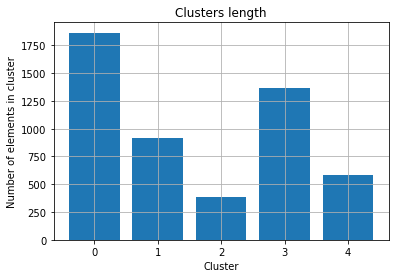

In [78]:
exist = True
try:
    f = open("../data/strokeData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    clusterCount = [0]*5
    dataset = kmeans(dataset,5)
    for i in range(5):
        clusterCount[i] = len(getClusterPoints(dataset,i))
    plt.bar([0,1,2,3,4],clusterCount)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)

    plt.savefig("clusterLength.png")
    